
#Introduction
In this project, we employ computer vision to come up with a system that has the ability to recognize and distinguish between happy and sad human facial expressions. Computer vision techniques are used to find and inspect facial expressions and provide insights into the emotional feelings of a human being considering the picture of the face.

#Data Gathering:

1. **Image Selection:** We Dive into our Google Photos and pick images that clearly represent moods. Aim for a balanced set with pictures showcasing happiness and contrasting emotions.

2. **Labeling:**  For each image, assign a clear label like "Happy" or "Not Happy." This helps the neural network understand the connection between image features and your moods.

#Training the Neural Network:

1. **Software Selection:** We Consider using libraries like TensorFlow or PyTorch for building and training your neural network. These offer user-friendly interfaces and extensive resources for image recognition tasks.

2. **Network Architecture:** Convolutional Neural Networks (CNNs) was explore as they excel at image analysis. CNNs can automatically extract features from your photos that are relevant for mood detection.

3. **Training Process:** The network will learn by iterating through the labeled images. During each iteration, it adjusts its internal parameters to better distinguish between happy and non-happy pictures.

#Importing the libraries

In [34]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img



#Unziping the folder


In [ ]:
!unzip /content/basedata.zip

Archive:  /content/basedata.zip

   creating: basedata/

   creating: basedata/.ipynb_checkpoints/

  inflating: basedata/.ipynb_checkpoints/Untitled-checkpoint.ipynb  

   creating: basedata/Testing/

  inflating: basedata/Testing/1.png  

  inflating: basedata/Testing/10.png  

  inflating: basedata/Testing/11.png  

  inflating: basedata/Testing/12.png  

  inflating: basedata/Testing/13.png  

  inflating: basedata/Testing/14.png  

  inflating: basedata/Testing/15.png  

  inflating: basedata/Testing/16.png  

  inflating: basedata/Testing/17.png  

  inflating: basedata/Testing/18.png  

  inflating: basedata/Testing/19.png  

  inflating: basedata/Testing/2.png  

  inflating: basedata/Testing/20.png  

  inflating: basedata/Testing/21.png  

  inflating: basedata/Testing/22.png  

  inflating: basedata/Testing/23.png  

  inflating: basedata/Testing/24.png  

  inflating: basedata/Testing/25.png  

  inflating: basedata/Testing/26.png  

  inflating: basedata/Testing/3.png  

 

#Loading a content from the happy folder

In [35]:
img = image.load_img("/content/basedata/Training/Happy Photo/5.png")

#Showing the image

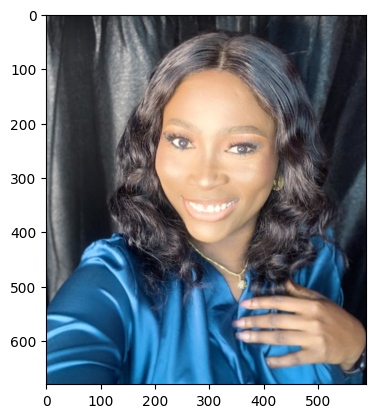

In [36]:
plt.imshow(img)

We Have 680 pixels Hight


We Have 588 pixels Width

#Reading the image

array([[[104, 101,  99],
        [106, 106, 104],
        [119, 119, 117],
        ...,
        [ 24,  20,  18],
        [ 22,  19,  16],
        [ 21,  16,  14]],

       [[102, 100,  97],
        [110, 111, 109],
        [123, 124, 121],
        ...,
        [ 25,  21,  18],
        [ 23,  19,  16],
        [ 22,  18,  15]],

       [[ 97,  95,  92],
        [115, 115, 113],
        [124, 124, 122],
        ...,
        [ 24,  21,  17],
        [ 24,  20,  17],
        [ 24,  19,  17]],

       ...,

       [[127,  83,  23],
        [128,  84,  26],
        [127,  84,  27],
        ...,
        [ 24,   9,   4],
        [ 25,   9,   5],
        [ 25,  10,   5]],

       [[127,  82,  24],
        [125,  81,  23],
        [125,  82,  25],
        ...,
        [ 25,   9,   5],
        [ 25,  10,   5],
        [ 25,  10,   5]],

       [[126,  82,  25],
        [123,  79,  21],
        [123,  80,  22],
        ...,
        [ 25,  10,   5],
        [ 25,  10,   5],
        [ 26,  11,   6]]], dtype=uint8)
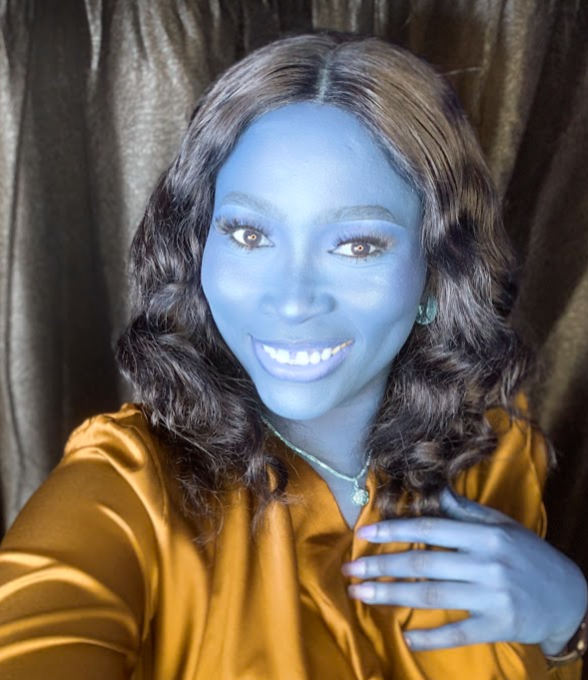

In [37]:
cv2.imread("/content/basedata/Training/Happy Photo/5.png")

#The above shows it uses a three-dimensional matrix.


#Getting the shape of the metrix

In [38]:
cv2.imread("/content/basedata/Training/Happy Photo/5.png").shape

(680, 588, 3)

The matrix is three-dimensional.


In [39]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

#Generating the training and Validation dataset

In [40]:
train_dataset = train.flow_from_directory('/content/basedata/Training',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

#The Class Mode is binary because we are given two label Happy and Not Happy

validation_dataset = train.flow_from_directory('/content/basedata/Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

#The Class Mode is binary because we are given two label Happy and Not Happy

Found 25 images belonging to 2 classes.

Found 25 images belonging to 2 classes.


In [41]:
train_dataset.class_indices

{'Happy Photo': 0, 'Not Happy Photo': 1}

In [42]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

#Defining the model

In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),


                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(500,activation='relu'),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')

                                    ]


)

#Compiling the model

In [47]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),

              #optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

#Fitting the model

In [48]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30

5/5 [==============================] - 9s 989ms/step - loss: 1.7065 - accuracy: 0.4667 - val_loss: 0.7714 - val_accuracy: 0.4800

Epoch 2/30

5/5 [==============================] - 3s 568ms/step - loss: 0.7374 - accuracy: 0.5385 - val_loss: 0.7016 - val_accuracy: 0.5200

Epoch 3/30

5/5 [==============================] - 4s 902ms/step - loss: 0.8945 - accuracy: 0.5385 - val_loss: 0.6435 - val_accuracy: 0.6800

Epoch 4/30

5/5 [==============================] - 3s 580ms/step - loss: 0.6773 - accuracy: 0.6667 - val_loss: 0.6131 - val_accuracy: 0.6000

Epoch 5/30

5/5 [==============================] - 3s 561ms/step - loss: 0.6184 - accuracy: 0.6923 - val_loss: 0.5870 - val_accuracy: 0.8000

Epoch 6/30

5/5 [==============================] - 4s 917ms/step - loss: 0.5672 - accuracy: 0.8000 - val_loss: 0.4752 - val_accuracy: 0.8800

Epoch 7/30

5/5 [==============================] - 3s 541ms/step - loss: 0.6144 - accuracy: 0.6154 - val_loss: 0.6745 - val_accuracy: 0.6800

Epoch 

#The above got 100% accuracy because we have less numbers of data point. both validation and training data are 100%

#Checking how the optimizer worked on the test data

In [49]:
dir_path = '/content/basedata/Testing'
for i in os.listdir(dir_path):
  print(i)

3.png

15.png

25.png

10.png

1.png

26.png

19.png

17.png

2.png

9.png

8.png

14.png

24.png

23.png

11.png

21.png

13.png

22.png

16.png

18.png

6.png

12.png

5.png

7.png

4.png

20.png


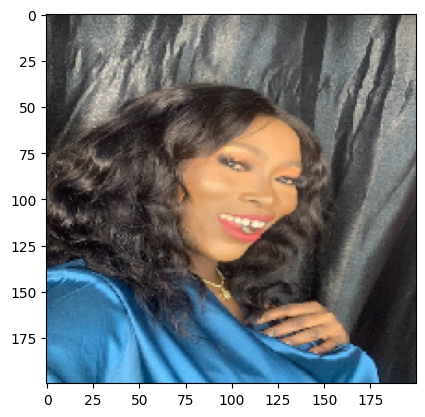

1/1 [==============================] - 0s 166ms/step

Happy Mood!


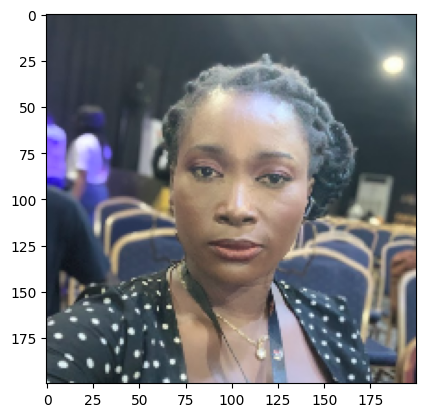

1/1 [==============================] - 0s 54ms/step

Not Happy Mood!


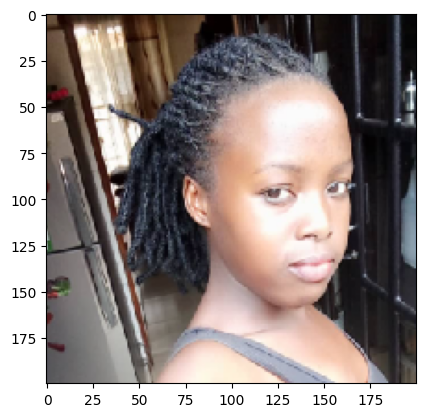

1/1 [==============================] - 0s 71ms/step

Not Happy Mood!


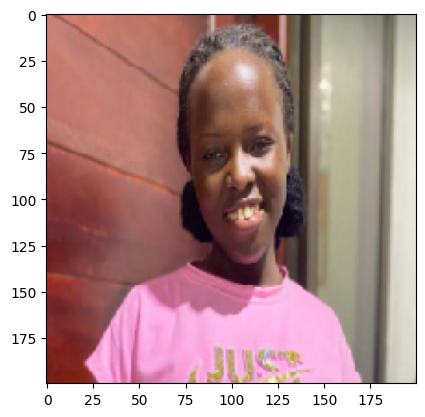

1/1 [==============================] - 0s 56ms/step

Happy Mood!


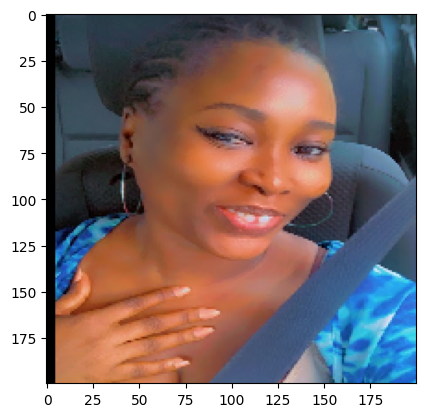

1/1 [==============================] - 0s 79ms/step

Happy Mood!


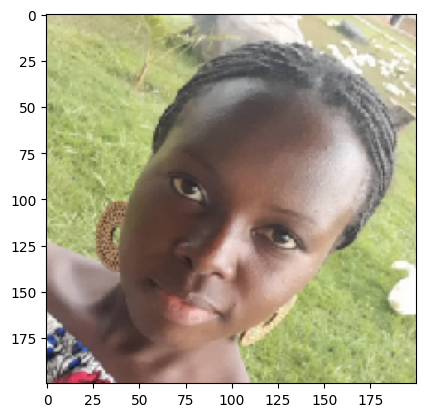

1/1 [==============================] - 0s 36ms/step

Not Happy Mood!


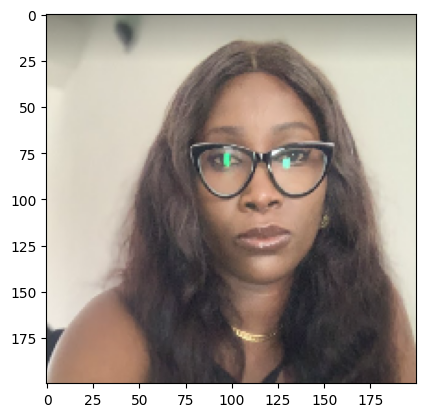

1/1 [==============================] - 0s 44ms/step

Not Happy Mood!


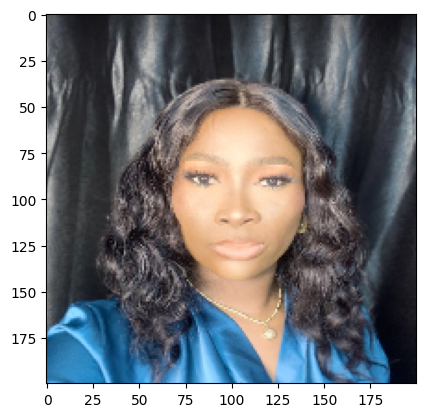

1/1 [==============================] - 0s 38ms/step

Not Happy Mood!


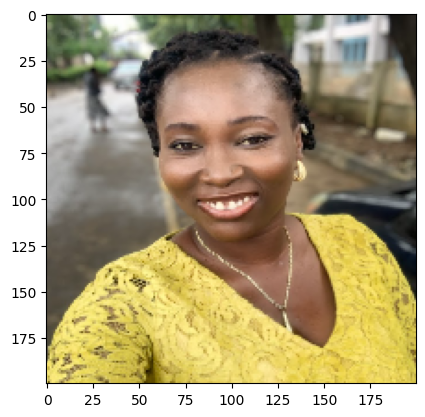

1/1 [==============================] - 0s 38ms/step

Happy Mood!


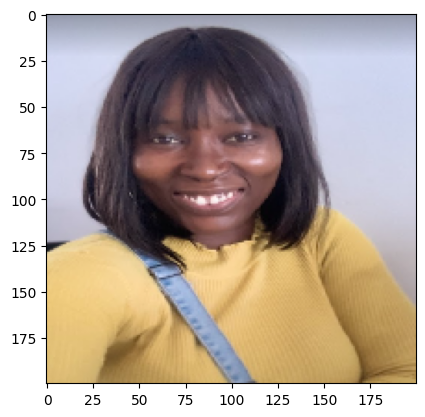

1/1 [==============================] - 0s 56ms/step

Happy Mood!


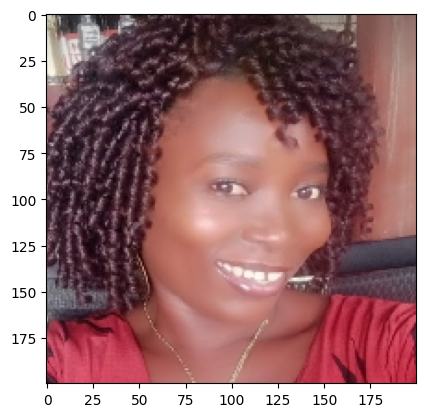

1/1 [==============================] - 0s 52ms/step

Happy Mood!


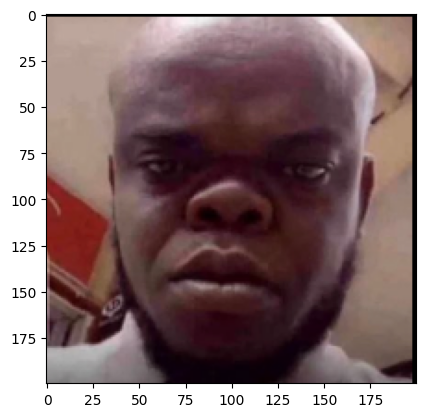

1/1 [==============================] - 0s 42ms/step

Not Happy Mood!


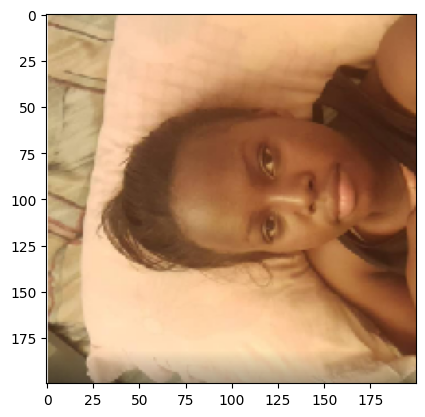

1/1 [==============================] - 0s 43ms/step

Not Happy Mood!


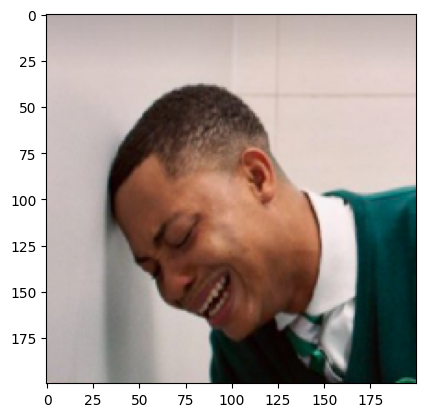

1/1 [==============================] - 0s 37ms/step

Not Happy Mood!


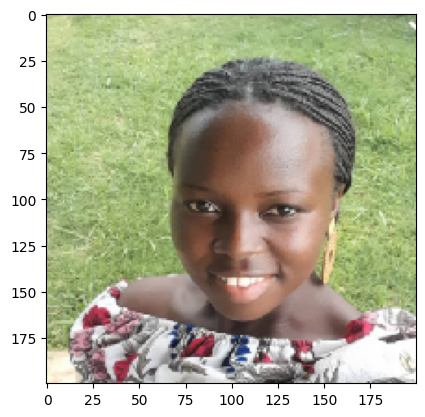

1/1 [==============================] - 0s 48ms/step

Happy Mood!


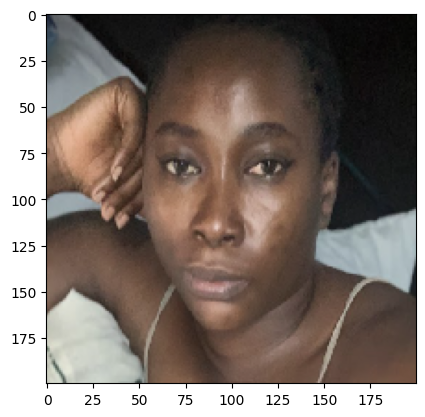

1/1 [==============================] - 0s 42ms/step

Not Happy Mood!


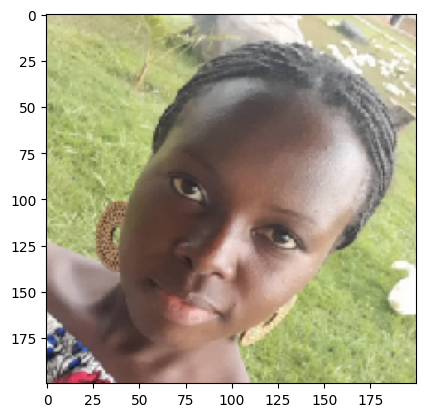

1/1 [==============================] - 0s 47ms/step

Not Happy Mood!


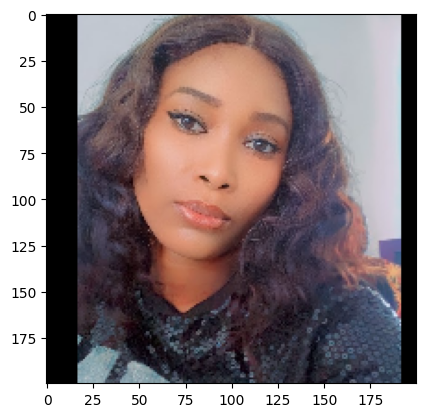

1/1 [==============================] - 0s 47ms/step

Not Happy Mood!


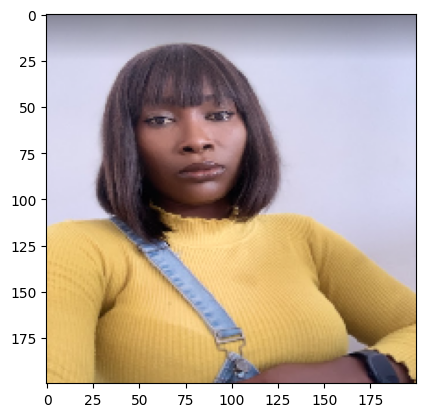

1/1 [==============================] - 0s 48ms/step

Not Happy Mood!


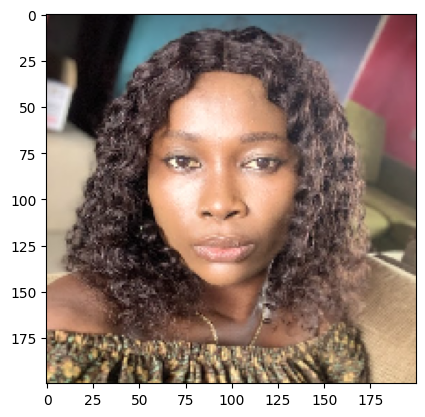

1/1 [==============================] - 0s 57ms/step

Not Happy Mood!


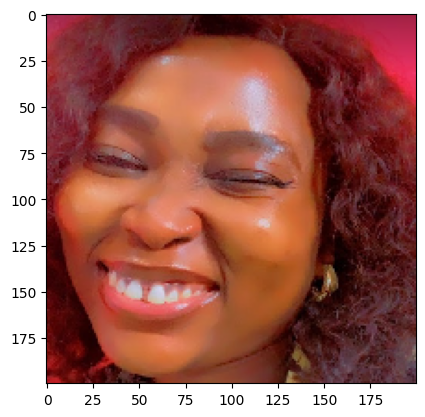

1/1 [==============================] - 0s 52ms/step

Happy Mood!


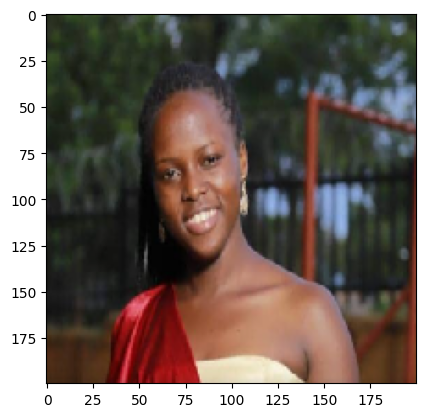

1/1 [==============================] - 0s 54ms/step

Happy Mood!


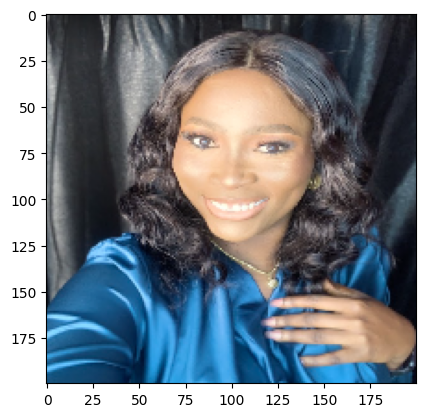

1/1 [==============================] - 0s 59ms/step

Happy Mood!


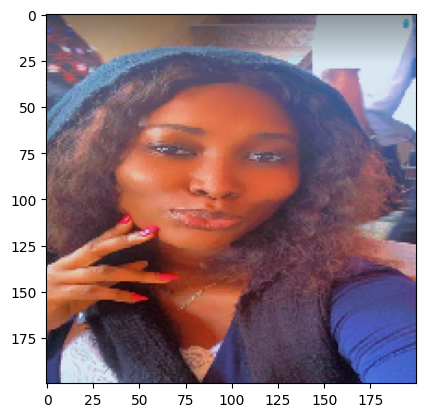

1/1 [==============================] - 0s 59ms/step

Happy Mood!


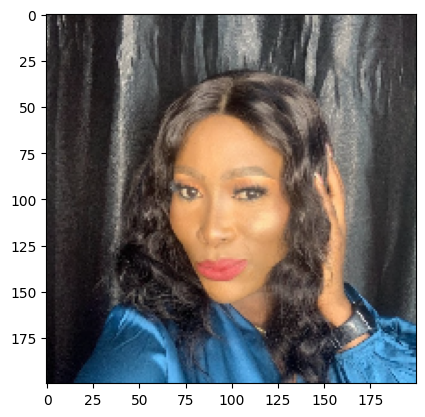

1/1 [==============================] - 0s 90ms/step

Happy Mood!


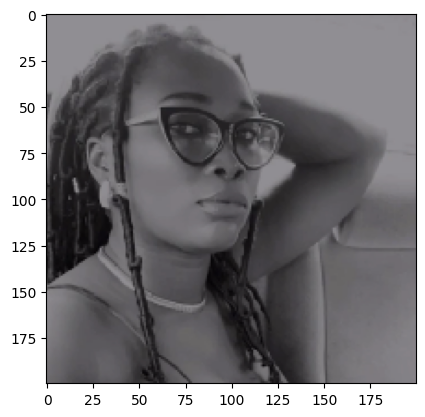

1/1 [==============================] - 0s 69ms/step

Not Happy Mood!


In [50]:
dir_path = '/content/basedata/Testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("Happy Mood!")
  else:
    print("Not Happy Mood!")

